###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
df = pd.read_csv('/content/college_1.csv')
df1 = pd.read_csv('/content/college_2.csv')

In [3]:
df.head(2)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0


In [4]:
df1.head(2)

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340


In [5]:
mer = pd.concat([df,df1],ignore_index = True)
mer

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [6]:
newdf = mer[mer['CodeKata Score'] > 15000]
newdf

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0


In [7]:
newdf.to_csv('Exceeded expectations.csv')

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [8]:
reached = mer[(mer['CodeKata Score'] > 10000) & (mer['CodeKata Score'] < 15000)]
reached.to_csv('Reached_expectations.csv')

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [9]:
improve = mer[(mer['CodeKata Score'] > 7000) & (mer['CodeKata Score'] < 10000)]

In [10]:
improve.to_csv('Needs_improvement.csv')

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [11]:
unsatisfactory  = mer[mer['CodeKata Score'] < 7000]

In [12]:
unsatisfactory.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [13]:
avg = mer.iloc[:,[3,4]].mean()
avg

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

###### No of students participated 

In [14]:
mer['Name'].count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [23]:
python_en = newdf['python_en'].mean()
python = newdf['python'].mean()
mysql = newdf['mysql'].mean()
python_en+python+mysql//3

105.0

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [15]:
mer.nlargest(3,'Rising')['Name']

92              shifak N
86     Ganesh Ramkumar R
102       Narasimhan Y L
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [16]:
mer.nlargest(3,'CodeKata Score')['Name']

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

In [17]:
scored = mer.groupby('Department')['CodeKata Score'].sum()

([<matplotlib.patches.Wedge at 0x7fd6ed946710>,
 [Text(-0.5411937677359137, 0.9576582405868004, 'Computer Science and Engineering'),
  Text(0.1794146978630061, -1.085269720479995, 'Electronics and Communication Engineering'),
  Text(1.0331050799533028, -0.3777484530407501, 'Electronics and Electrical Engineering')],
 [Text(-0.29519660058322555, 0.5223590403200729, '66.37'),
  Text(0.09786256247073058, -0.5919653020799972, '22.47'),
  Text(0.5635118617927106, -0.20604461074950006, '11.16')])

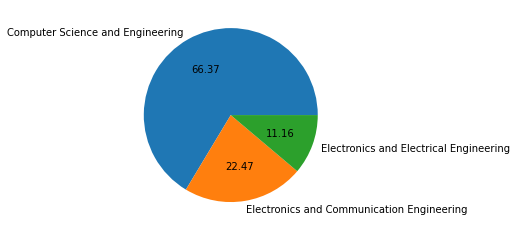

In [ ]:
plt.pie(scored.values,labels = scored.index,autopct = '%.2f' )

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [24]:
scoret = mer.groupby('Department')['CodeKata Score'].nlargest(3)

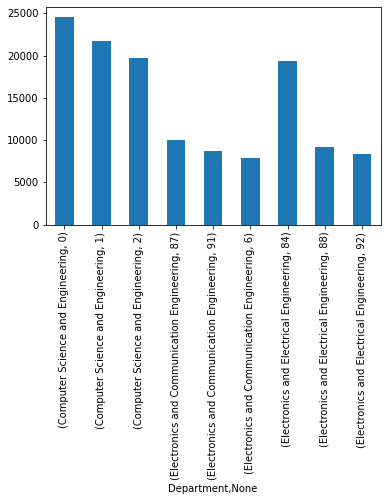

In [26]:
scoret.plot.bar()

from here we can conclude cse department toppers have scored more than other departments 